In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [9]:
from __future__ import print_function
import matplotlib.pyplot as plt
import os

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from sklearnex import patch_sklearn

In [10]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [6]:
df_train.isna().sum()

# 특성은 sklearn의 simpleImputer를 사용한다
# 다만 다른 특성(features)을 참조해 대표 값을 더 섬세하게 채워줄 수 있다면 fillna()를 쓰는 것이 훨씬 낫다.

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
df_columns = df_train.columns
df_columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [12]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy="most_frequent")
df_train = pd.DataFrame(my_imputer.fit_transform(df_train))
df_test= pd.DataFrame(my_imputer.fit_transform(df_test))

for n in range(len(df_columns)) :
    df_train = df_train.rename(columns = {n:df_columns[n]})
    df_test = df_test.rename(columns = {n:df_columns[n]})
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [13]:
# 큰 분포 -> 그룹화
df_train['Age']=(df_train.Age-df_train.Age%10).astype(np.float)
df_test['Age']=(df_test.Age-df_test.Age%10).astype(np.float)
# df_train['Service']=df_train.RoomService+df_train.VRDeck+df_train.Spa
# df_test['Service']=df_test.RoomService+df_test.VRDeck+df_test.Spa
# df_train['Shopping']=df_train.FoodCourt+df_train.ShoppingMall
# df_test['Shopping']=df_test.FoodCourt+df_test.ShoppingMall

# df_train['Service']=df_train.Service-df_train.Service%100
# df_test['Service']=df_test.Service-df_test.Service%100

# df_train['Shopping']=df_train.Shopping-df_train.Shopping%100
# df_test['Shopping']=df_test.Shopping-df_test.Shopping%100


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


### For data discretizing

service = RoomSerivce+VRDeck+Spa
shopping = FoodCourt+ShoppingMall

and %10

In [14]:
df_train[['Deck','Num','Side']] = df_train.Cabin.str.split('/',expand=True)
df_test[['Deck','Num','Side']] = df_test.Cabin.str.split('/',expand=True)
# df_train['PassengerGroup'] = df_train.PassengerId.str.split('_', expand = True)[0]
# df_test['PassengerGroup'] = df_train.PassengerId.str.split('_', expand = True)[0]

In [15]:
#df_train=df_train.drop(['Num','Age','VIP','ShoppingMall','FoodCourt'],axis=1)
#df_test=df_test.drop(['Num','Age','VIP','ShoppingMall','FoodCourt'],axis=1)
df_train=df_train.drop(['VIP'],axis=1)
df_test=df_test.drop(['VIP'],axis=1)
df_train=df_train.drop(['Num'],axis=1)
df_test=df_test.drop(['Num'],axis=1)
# df_train=df_train.drop(['Deck'],axis=1)
# df_test=df_test.drop(['Deck'],axis=1)
# df_train=df_train.drop(['Side'],axis=1)
# df_test=df_test.drop(['Side'],axis=1)

# VIP, Num is skrewed data. so drop that. 

In [368]:
# df_train= df_train.drop(['RoomService','VRDeck','Spa'],axis=1)
# df_test= df_test.drop(['RoomService','VRDeck','Spa'],axis=1)
# df_train= df_train.drop(['FoodCourt','ShoppingMall'],axis=1)
# df_test= df_test.drop(['FoodCourt','ShoppingMall'],axis=1)

In [16]:
categorical_cols= ['HomePlanet','CryoSleep','Destination','Deck','Side']
for i in categorical_cols:
    print(i)
    le=LabelEncoder()
    arr=np.concatenate((df_train[i], df_test[i])).astype(str)
    le.fit(arr)
    df_train[i]=le.transform(df_train[i].astype(str))
    df_test[i]=le.transform(df_test[i].astype(str))

HomePlanet
CryoSleep
Destination
Deck
Side


In [17]:
df_train= df_train.drop(['Name','Cabin', 'PassengerId'],axis=1)
df_test_result = df_test.copy()
df_test= df_test.drop(['Name','Cabin', 'PassengerId'],axis=1)

df_train['Transported']=df_train['Transported'].replace({True:1,False:0})

In [18]:
X = df_train.drop('Transported', axis = 1)
y = df_train['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Check Correlation

In [372]:
fields = list(df_train.columns)
print(fields)
correlations = abs(df_train[fields].corrwith(df_train['Transported']))
print(correlations)
correlations.sort_values(inplace=True,ascending=False)
del correlations['Transported']

high_cor = np.array(correlations.index)
high_cor
# age가 자꾸 빠지는 현상 발생 -> data 형식 float, int 에 따라 적용 여부 결정

['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck', 'Side']
HomePlanet     0.115461
CryoSleep      0.460132
Destination    0.108152
Age            0.072241
Transported    1.000000
Deck           0.113992
Side           0.101397
dtype: float64


array(['CryoSleep', 'HomePlanet', 'Deck', 'Destination', 'Side', 'Age'],
      dtype=object)

# K-nearest Neighbor test : All Hyper-parameter is Default Value.


In [373]:
from sklearn.model_selection import cross_val_score

MaxScore=0
MaxScoreK=0
for k in range (1,71,2):
    knn = KNeighborsClassifier(n_neighbors=k,p=1);#manhattan

    knn.fit(X_train, y_train);

    y_pred = knn.predict(X_train);
   
    cv_N = 10
    scores = cross_val_score(knn, X_train, y_train, cv=cv_N)

    if MaxScore<=np.mean(scores):
        MaxScore=np.mean(scores)
        MaxScoreK=k

knn = KNeighborsClassifier(n_neighbors=MaxScoreK,p=1);
knn.fit(X_train, y_train);
y_pred = knn.predict(X_test);
print(accuracy_score(y_test.values, y_pred))

0.7787576687116564


In [374]:
MaxScore=0
MaxScoreK=0
for k in range (1,71,2):
    knn = KNeighborsClassifier(n_neighbors=k,p=2);#eclidean

    knn.fit(X_train, y_train);

    y_pred = knn.predict(X_train);

    cv_N = 10
    scores = cross_val_score(knn, X_train, y_train, cv=cv_N)
  
    if MaxScore<=np.mean(scores):
        MaxScore=np.mean(scores)
        MaxScoreK=k

knn = KNeighborsClassifier(n_neighbors=MaxScoreK,p=2);
knn.fit(X_train, y_train);
y_pred = knn.predict(X_test);
print(accuracy_score(y_test.values, y_pred))

0.7802914110429447


# Naive Bayes Test

In [375]:
NB = GaussianNB();

NB.fit(X_train, y_train);

y_pred = NB.predict(X_test);

print(accuracy_score(y_test.values, y_pred));

0.7135736196319018


In [376]:
NB = BernoulliNB();

NB.fit(X_train, y_train);

y_pred = NB.predict(X_test);

print(accuracy_score(y_test.values, y_pred));

0.741180981595092


In [377]:
NB = MultinomialNB();

NB.fit(X_train, y_train);

y_pred = NB.predict(X_test);

print(accuracy_score(y_test.values, y_pred));

0.7664877300613497


# Support Vecctor Classification

In [19]:
X_stra_train, X_stra_validation, y_stra_train, y_stra_validation = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0)
#SVC에서 Probability를 True로 한다면 5-Fold Cross Validation이 일어난다.


In [398]:
# Cs = []
# for i in range(1, 50):
#     Cs.append(0.05* i)
# kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# for C in Cs :
#     for kernel in kernels :
#         if kernel == 'linear' :
#             linSVC = LinearSVC(C = C)
#             linSVC.fit(X_train, y_train)
#             y_pred = linSVC.score(X_stra_validation, y_stra_validation)
#             print(str(C) + " and " + str(kernel) + " : " + str(y_pred))
#         else :
#             svc = SVC(probability = True, random_state = 42, C = C, kernel = kernel)
#             svc.fit(X_train , y_train)
#             y_pred = svc.score(X_stra_validation, y_stra_validation)
#             print(str(C) + " and " + str(kernel) + " : " + str(y_pred))

0.05 and linear : 0.7349051178838413
0.05 and poly : 0.574468085106383
0.05 and rbf : 0.7538815411155837
0.05 and sigmoid : 0.691776883266245
0.1 and linear : 0.682576193214491
0.1 and poly : 0.5842438182863715
0.1 and rbf : 0.7642323174238068
0.1 and sigmoid : 0.7389304197814837
0.15000000000000002 and linear : 0.6756756756756757
0.15000000000000002 and poly : 0.5899942495687176
0.15000000000000002 and rbf : 0.7642323174238068
0.15000000000000002 and sigmoid : 0.7389304197814837
0.2 and linear : 0.6808510638297872
0.2 and poly : 0.59401955146636
0.2 and rbf : 0.7648073605520413
0.2 and sigmoid : 0.7377803335250144
0.25 and linear : 0.7757331799884991
0.25 and poly : 0.5968947671075331
0.25 and rbf : 0.7682576193214491
0.25 and sigmoid : 0.7366302472685451
0.30000000000000004 and linear : 0.7395054629097182
0.30000000000000004 and poly : 0.5980448533640023
0.30000000000000004 and rbf : 0.7682576193214491
0.30000000000000004 and sigmoid : 0.738355376653249
0.35000000000000003 and linear

각 linear, rbf, poly, sigmoid 커널을 사용하여 범위 0.025부터 2.475까지 값을 동작하였을 때 

RBF 커널을 이용한 뒤, C가 2.325에서 가장 높은 수치인 0.78205865439908로 등장하였다. 

In [24]:
from sklearn.kernel_approximation import RBFSampler
rbfSample = RBFSampler()

Cs = [0.0001, 0.0025, 0.005, 0.0075, 0.01, 0.02]
gamma = ['scale', 'auto']
X_train_rbf = rbfSample.fit_transform(X_stra_train)
X_validation_rbf = rbfSample.transform(X_stra_validation)

#SVC에서 Probability를 True로 한다면 5-Fold Cross Validation이 일어난다.

for C in Cs :
    for gamm in gamma :
        svc = SVC(probability = True, random_state = 42, C = C, gamma = gamm)
        svc.fit(X_train_rbf , y_stra_train)
        y_pred = svc.score(X_validation_rbf, y_stra_validation)
        print(y_pred)


0.503737780333525
0.503737780333525
0.503737780333525
0.503737780333525
0.503737780333525
0.503737780333525
0.503737780333525
0.503737780333525
0.503737780333525
0.503737780333525
0.503737780333525
0.503737780333525


`RBF Sampling을 마쳤을 때, 평균적으로 0.5의 정확도를 보였습니다.`

In [27]:
from sklearn.kernel_approximation import Nystroem
mys = Nystroem()


Cs = [0.0001, 0.0025, 0.005, 0.0075, 0.01, 0.02]
gamma = ['scale', 'auto']
X_train_nys = mys.fit_transform(X_stra_train)
X_validation_nys = mys.transform(X_stra_validation)

#SVC에서 Probability를 True로 한다면 5-Fold Cross Validation이 일어난다.

for C in Cs :
    for gamm in gamma :
        svc = SVC(probability = True, random_state = 42, C = C, gamma = gamm)
        svc.fit(X_train_nys , y_stra_train)
        y_pred = svc.score(X_validation_nys, y_stra_validation)
        print(y_pred)


0.503737780333525
0.503737780333525
0.7182288671650374
0.503737780333525
0.7182288671650374
0.503737780333525
0.7182288671650374
0.503737780333525
0.718803910293272
0.503737780333525
0.7193789534215066
0.503737780333525



```
Nystroem로 Sampling을 마쳤을 때, 평균적으로 0.5의 정확도를 보였습니다.

SVC는 시간 소요가 너무 길어 RbfSampler와 Nystroem을 이용해 실행 시간을 단축시키려했지만 결과적으로 현 데이터에서는 accuracy가 떨어지는 것을 확인 할 수 있습니다.
```

# Decision Tree Test

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print(accuracy_score(y_test.values, y_pred))

0.7446319018404908


In [36]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

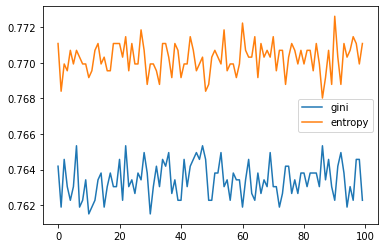

In [50]:
import matplotlib.pyplot as plt

gini_trees = []
entropy_trees = []
high_trees = []

gini_tree = DecisionTreeClassifier(criterion="gini",max_depth=10)
entropy_tree = DecisionTreeClassifier(criterion="entropy",max_depth=10)

high_trees = []
for i in range(100) :
    gini_tree.fit(X_train, y_train)
    entropy_tree.fit(X_train, y_train)
    gini_trees.append(accuracy_score(y_test.values, gini_tree.predict(X_test)))
    entropy_trees.append(accuracy_score(y_test.values, entropy_tree.predict(X_test)))
plt.plot(range(100),gini_trees,label = "gini")
plt.plot(range(100),entropy_trees,label = "entropy")

plt.legend()
plt.show()

In [33]:
param_grid = {'max_depth':range(1, entropy_tree.tree_.max_depth+1, 2),
              'max_features': range(1, len(entropy_tree.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(criterion="entropy",random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [34]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(59, 5)

In [37]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)
train_test_gr_error

,train,test
accuracy,0.793098,0.778374
precision,0.754813,0.738571
recall,0.871527,0.869598
f1,0.808982,0.798747


In [385]:
result = GR.predict(df_test)
result = np.array(map(bool,result))
print(result)
df_test_result=df_test_result['PassengerId'].to_frame()
df_test_result['Transported'] = result

df_test_result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [386]:
df_test_result.to_csv("submission.csv",index=False)
df_test_result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knnClassifier = KNeighborsClassifier(3)
knnClassifier.fit(X_train, y_train)
y_pred = knnClassifier.predict(X_test)
print(accuracy_score(y_test.values, y_pred))

0.7707055214723927


In [46]:
classifiers = {
    "KNN" : KNeighborsClassifier(),
    "GNB" : GaussianNB(),
    "MNB" : MultinomialNB(),
    "LSVC" : LinearSVC(),
    "SVC" : SVC(),
    "DT" : DecisionTreeClassifier()
}
KNN_grid = {'n_neighbors' : [i for i in range(1,50,2)]}
GNB_grid = {'var_smoothing' : [1e-10, 1e-9, 1e-8, 1e-7]}
MNB_grid = {}
LSVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5]}
SVC_grid = {'C': [2,2.45,2.5,2.75],
            'kernel': ['rbf'],
            'gamma': ['scale', 'auto']}
DT_grid = {'max_depth':range(1, entropy_tree.tree_.max_depth+1, 2),
            'max_features': range(1, len(entropy_tree.feature_importances_)+1),
          'criterion' : ['entropy']}
grid = {
    "KNN" : KNN_grid,
    "GNB": GNB_grid,
    "MNB": MNB_grid,
    "SVC" : SVC_grid,
    "LSVC" : LSVC_grid,
    "DT" : DT_grid
}


In [49]:
import time

i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_test, y_test)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

Model: KNN
Training time (mins): 0.09

Model: GNB
Training time (mins): 0.0

Model: MNB
Training time (mins): 0.0



/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model: LSVC
Training time (mins): 0.07

Model: SVC
Training time (mins): 0.53

Model: DT
Training time (mins): 0.03



In [51]:
valid_scores

,Classifer,Validation accuracy,Training time
0,KNN,0.779908,0.09
1,GNB,0.713957,0.00
2,MNB,0.766488,0.00
3,LSVC,0.743482,0.07
4,SVC,0.779525,0.53
5,DT,0.776840,0.03


4가지 알고리즘 모델에 대해 공통적으로 다음과 같은 프로세스를 진행하였습니다.

1. 데이터 탐색
2. 데이터 전처리 ( Missing value 처리, feature engineering )
3. 모델 선택 및 하이퍼 파라미터 설정

실험의 데이터 전처리 과정에서 Missing value를 최빈값으로 설정하는 경우 가장 좋은 성능을 보여줬습니다. 연속적인 'Age'와 같은 column은 값 자체 하나하나의 의미가 사라지므로 이를 그룹화하여 categorical 데이터로 인코딩 작업을 진행했습니다. Correlation이 낮은 feature들은 관계가 낮으므로 필요가 없을 것이라 예측했지만 실제로 해당 feature를 빼고 학습을 진행하면 성능이 낮아지는 것을 확인할 수 있었습니다. 또하 데이터의 편향을 확인하기 위해 skew 함수를 이용해 limit이 0.75이상인 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'을 log화했지만 실제로는 성능이 낮아지는 결과를 통해 데이터 전처리 방식이 항상 모델의 성능을 향상시키지만은 않는다는 것을 알 수 있습니다.

4가지 알고리즘 모듈의 하이퍼 파라미터는 모두 상이하므로 각 하이퍼 파라미터에 대한 GridSearch 방식을 통해 최적의 하이퍼파라미터를 구해 모델을 생성했습니다. 실험 과정을 통해 초기 Baseline 모델보다 KNN( 0.7530 -> 0.7799 ), DT(0.7361 -> 0.7699)과 같이 모델의 성능이 향상된 것을 확인할 수 있습니다.

각 알고리즘에 대한 분석과 비교를 위해 실험으로부터 얻은 위의 표로부터 다음과 같은 결과를 확인할 수 있습니다.

Accuracy  : GNB < LSVC < MNB < DT < SVC < KNN
Time : GNB = MNB < DT < LSVC < KNN < SVC

결과로부터 KNN이 가장 높은 Accuracy를 보여주지만 현재 Time 역시 높은 것을 확인할 수 있습니다. 따라서 Real Time이 중요한 문제라면 시간이 짧으면서도 accuracy가 KNN과 비교적 유사한 DT를 고려해보겠지만 현재는 Real Time이 중요한 문제가 아니므로 KNN 모델을 채택하는 것이 가장 적합해보입니다.

KNN은 별도의 학습과정이 없는 간단한 알고리즘입니다. 하지만 모든 column의 데이터에 대해 실제로 계산을 진행하므로 시간이 오래 걸릴지언정 높은 정확도를 보이는 것을 실험을 통해서 확인할 수 있습니다. 또한 데이터 전처리 과정에서 도메인 지식에 따라 가정을 통해 feature engineering을 진행하다보니 다른 알고리즘들은 이에 영향을 받는 모습들은 확인할 수 있었지만 KNN은 Dynamic한 변화 없이 일정하고 안정적인 결과를 도출해내는 것을 확인할 수 있습니다. 하지만 column이 많아질 수록 연산량은 배수만큼 증가하므로 데이터셋이 작은 Classification 모델에서는 baseline으로 KNN을 채택하는 것이 적합해보입니다.